# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

# Exercises 13 - Page no : 180
Exercise: In NSFG Cycles 6 and 7, the variable cmdivorcx contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [34]:
def CleanData(resp):
 # using replace and cmdivorcx data
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp['notdivorced'] = resp.cmdivorcx.isnull().astype(int)
    # duration calculation
    resp['duration'] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp['durationsofar'] = (resp.cmintvw - resp.cmmarrhx) / 12.0
    # seting upt the first date 1900
    month0 = pd.to_datetime('1900-01-01')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

In [39]:
CleanData(resp6)
married6 = resp6[resp6.evrmarry==1]

CleanData(resp7)
married7 = resp7[resp7.evrmarry==1]

In [35]:
# Solution goes here

#Resample Divorce Curve funcion - divorce curves based on resampled data
def ResampleDivorceCurve(resps):
   # using the for loop for - respondent DataFrames
    for _ in range(11):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        PlotDivorceCurveByDecade(sample, color='#225EA8', alpha=0.1)

    thinkplot.Show(xlabel='years',
                   axis=[0, 28, 0, 1])
    
    

In [36]:
# Solution goes here

# Resample divorcecurve by Decare and passing respondents - as per the refeerence - Quantifying uncertainty

def ResampleDivorceCurveByDecade(resps):

    for i in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')
        if i == 0:
            survival.AddLabelsByDecade(groups, alpha=0.7)

        EstimateSurvivalByDecade(groups, alpha=0.1)

    thinkplot.Config(xlabel='Years of Married',
                     ylabel='Fraction undivorced',
                     axis=[0, 28, 0, 1])
    

In [37]:
# Solution goes here

# as per Survival analysis modules created the EstimateSurvivalByDecade
def EstimateSurvivalByDecade(groups, **options):
   
    thinkplot.PrePlot(len(groups))
    for name, group in groups:
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)
        
        

In [38]:
# Solution goes here

# as per Survival analysis modules created the EstimateSurvival by passing respondents
def EstimateSurvival(resp):
 
    complete = resp[resp.notdivorced == 0].duration.dropna()
    ongoing = resp[resp.notdivorced == 1].durationsofar.dropna()
    
    # Hazard Funtion - as per Hazard Reference
    hf = survival.EstimateHazardFunction(complete, ongoing)
    # used this funciton in my assingmet too
    sf = hf.MakeSurvival()

    return hf, sf



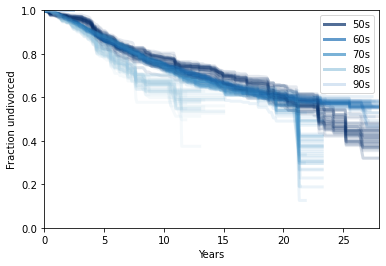

In [40]:
# Solution goes here
#Resample divorce Curve by decare
ResampleDivorceCurveByDecade([married6, married7])



In [ ]:
Conclusion :
    The above plot explains Years vs Fraction undivorced ( Survived)